# QuTiP example: Groundstate of an ultra-strong coupled atom-cavity system

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from qutip import *
import time
from mpl_toolkits.mplot3d import Axes3D

In [27]:
def compute(N, wc, wa, glist, use_rwa):

    # Pre-compute operators for the hamiltonian
    a  = tensor(destroy(N), qeye(2)) #Shape: (40,40)
    sm = tensor(qeye(N), destroy(2))# Sigma minus
    nc = a.dag() * a
    na = sm.dag() * sm
    idx = 0
    na_expt = np.zeros(shape(glist))
    nc_expt = np.zeros(shape(glist))
    for g in glist:

        # recalculate the hamiltonian for each value of g
        if use_rwa: 
            H = wc * nc + wa * na + g * (a.dag() * sm + a * sm.dag())
        else:
            H = wc * nc + wa * na + g * (a.dag() + a) * (sm + sm.dag())

        # find the groundstate of the composite system
        evals, ekets = H.eigenstates()
        psi_gnd = ekets[0] #shape :(40,1)
        na_expt[idx] = expect(na, psi_gnd)
        nc_expt[idx] = expect(nc, psi_gnd)

        idx += 1

    return nc_expt, na_expt, ket2dm(psi_gnd)
    
#
# set up the calculation
#
wc = 1.0 * 2 * np.pi   # cavity frequency
wa = 1.0 * 2 * np.pi   # atom frequency
N = 20              # number of cavity fock states
use_rwa = False     # Set to True to see that non-RWA is necessary in this regime

glist = np.linspace(0, 2.5, 50) * 2 * np.pi # coupling strength vector
start_time = time.time()
nc, na, rhoss_final = compute(N, wc, wa, glist, use_rwa)
print(rhoss_final.shape)
print(nc.shape)
print('time elapsed = ' + str(time.time() - start_time)) 

(40, 40)
(50,)
time elapsed = 1.2253711223602295


In [22]:
help(ket2dm)

Help on function ket2dm in module qutip.states:

ket2dm(Q)
    Takes input ket or bra vector and returns density matrix
    formed by outer product.
    
    Parameters
    ----------
    Q : qobj
        Ket or bra type quantum object.
    
    Returns
    -------
    dm : qobj
        Density matrix formed by outer product of `Q`.
    
    Examples
    --------
    >>> x=basis(3,2)
    >>> ket2dm(x)
    Quantum object: dims = [[3], [3]], shape = [3, 3], type = oper, isHerm = True
    Qobj data =
    [[ 0.+0.j  0.+0.j  0.+0.j]
     [ 0.+0.j  0.+0.j  0.+0.j]
     [ 0.+0.j  0.+0.j  1.+0.j]]



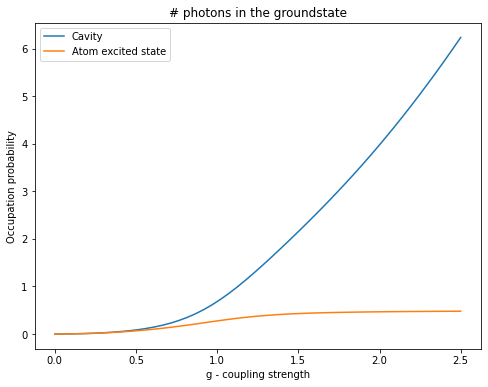

In [20]:
#
# plot the cavity and atom occupation numbers as a function of 
#
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(glist/(2*np.pi), nc)
ax.plot(glist/(2*np.pi), na)
ax.legend(("Cavity", "Atom excited state"))
ax.set_xlabel('g - coupling strength')
ax.set_ylabel('Occupation probability')
ax.set_title('# photons in the groundstate');

(20, 20)


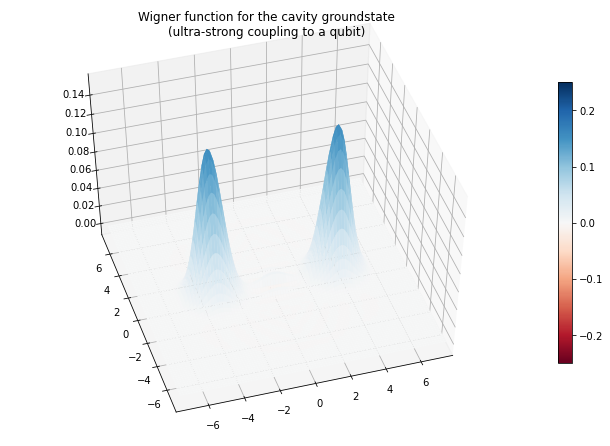

In [31]:
#
# plot the cavity wigner function for the cavity state (final coupling strenght)
#
fig = plt.figure(2, figsize=(9, 6))
rho_cavity = ptrace(rhoss_final, 0)#N tensor 2, only take the partial trace of atom, giving NxN caivity rho.
#If (rhoss_final,1), then ptrace of cavity would give 2x2 atom rho.
print(rho_cavity.shape)

xvec = np.linspace(-7.5,7.5,100)
X,Y = np.meshgrid(xvec, xvec)
W = wigner(rho_cavity, xvec, xvec)#wigner function
ax = Axes3D(fig, azim=-107, elev=49)
surf=ax.plot_surface(X, Y, W, rstride=1, cstride=1, cmap=plt.cm.RdBu, alpha=1.0, linewidth=0.05, 
                     vmax=0.25, vmin=-0.25)
ax.set_xlim3d(-7.5, 7.5)
ax.set_ylim3d(-7.5, 7.5)
fig.colorbar(surf, shrink=0.65, aspect=20)
ax.set_title("Wigner function for the cavity groundstate\n(ultra-strong coupling to a qubit)");

In [28]:
help(wigner)

Help on function wigner in module qutip.wigner:

wigner(psi, xvec, yvec, method='clenshaw', g=1.4142135623730951, sparse=False, parfor=False)
    Wigner function for a state vector or density matrix at points
    `xvec + i * yvec`.
    
    Parameters
    ----------
    
    state : qobj
        A state vector or density matrix.
    
    xvec : array_like
        x-coordinates at which to calculate the Wigner function.
    
    yvec : array_like
        y-coordinates at which to calculate the Wigner function.  Does not
        apply to the 'fft' method.
    
    g : float
        Scaling factor for `a = 0.5 * g * (x + iy)`, default `g = sqrt(2)`.
        The value of `g` is related to the value of `hbar` in the commutation
        relation `[x, y] = i * hbar` via `hbar=2/g^2` giving the default
        value `hbar=1`.
    
    method : string {'clenshaw', 'iterative', 'laguerre', 'fft'}
        Select method 'clenshaw' 'iterative', 'laguerre', or 'fft', where 'clenshaw'
        and 'it

## Software version:

In [8]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.3.0.dev0+6e5b1d43
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.25.2
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.2 |Anaconda custom (x86_64)| (default, Jul 20 2017, 13:14:59) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
